In [1]:
# Importing libraries used in analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [2]:
train_one = pd.read_csv("train_subset_one.csv")
train_one.head()

,ID,bstatus,trans_cf_td,trans_ca_cl,trans_re_ta,trans_ni_ta,trans_td_ta,trans_s_ta,trans_wc_ta,trans_wc_s,trans_c_cl,trans_cl_e,trans_in_s,trans_mve_td
0,1,1,1.369133,0.159440,6.264666,7.925562,0.284705,0.352420,6.634741,1.615486,0.043509,5.754275,0.492229,0.000052
1,8,1,1.369146,0.193525,6.254598,7.926685,0.428059,0.361323,6.643461,1.615509,0.045663,5.749319,0.494099,0.000022
2,9,1,1.369152,0.091170,6.262990,7.929290,0.362779,0.318979,6.598579,1.615371,0.097625,5.772822,0.474197,0.000014
3,16,1,1.369160,0.197056,6.267393,7.935601,0.276216,0.390957,6.633439,1.615470,0.098018,5.752945,0.488630,0.000055
4,17,1,1.369127,0.132771,6.267578,7.918323,0.325407,0.249080,6.614257,1.615437,0.056851,5.753276,0.501103,0.000014


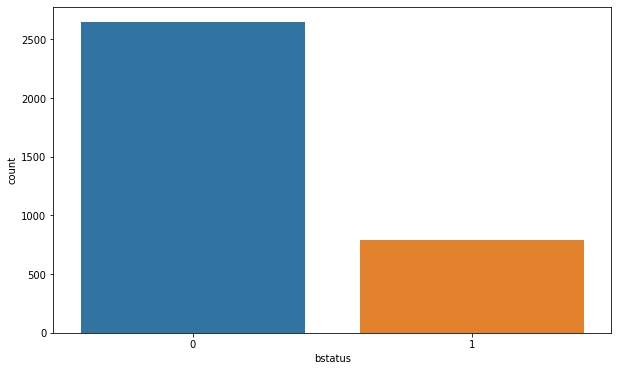

In [3]:
# Displaying the frequency chart for output variable (bstatus = bankruptcy status)
plt.figure(figsize=(10,6))
sns.countplot(x='bstatus',data = train_one)

Index(['Intercept', 'trans_cf_td', 'trans_ca_cl', 'trans_re_ta', 'trans_ni_ta',
       'trans_td_ta', 'trans_s_ta', 'trans_wc_ta', 'trans_wc_s', 'trans_c_cl',
       'trans_cl_e', 'trans_in_s', 'trans_mve_td'],
      dtype='object')
[0. 0. 0. ... 0. 0. 0.]
[[0.72065431 0.27934569]
 [0.63054762 0.36945238]
 [0.63371054 0.36628946]
 ...
 [0.67225055 0.32774945]
 [0.99690726 0.00309274]
 [0.9629722  0.0370278 ]]
0.7964524571096249
0.8012069600424343
[[2564   83]
 [ 617  175]]
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      2647
         1.0       0.68      0.22      0.33       792

    accuracy                           0.80      3439
   macro avg       0.74      0.59      0.61      3439
weighted avg       0.78      0.80      0.75      3439

[44783.524662750766, 1.023560399233504, 2.548666825926871, 2.7720869343761296, 1.4004309702855111, 1.6565389061363438, 1.1611782734880625, 3.633459852949212, 1.2975109245973722, 2.298878497891444

/home/gonzalo/repos/Bankruptcy-Prediction-using-Machine-Learning-Algorithms-in-Python/Bankruptcy-Prediction-using-Machine-Learning-Algorithms-in-Python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


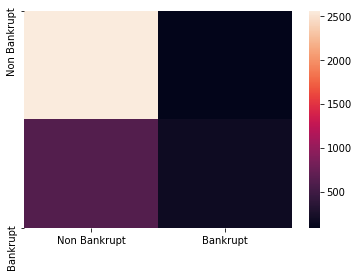

In [4]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('bstatus ~ trans_cf_td + trans_ca_cl + trans_re_ta + trans_ni_ta + trans_td_ta + trans_s_ta + trans_wc_ta + trans_wc_s + trans_c_cl + trans_cl_e + trans_in_s + trans_mve_td',
                  train_one, return_type="dataframe")
print (X.columns)


# In[24]:

# flatten y into a 1-D array
y = np.ravel(y)


# In[25]:

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)
# check the accuracy on the training set
model.score(X, y)


# In[26]:

# what percentage was bankrupt 
y.mean()


# In[27]:

# predict class labels for the data
predicted = model.predict(X)
print (predicted)


# In[28]:

# generate class probabilities
probs = model.predict_proba(X)
print (probs)


# In[29]:

from sklearn import metrics
# generate evaluation metrics
print (metrics.accuracy_score(y, predicted))
print (metrics.roc_auc_score(y, probs[:, 1]))


# In[30]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
print (metrics.confusion_matrix(y, predicted))
print (metrics.classification_report(y, predicted))
cm = confusion_matrix(y, predicted)
sns.heatmap(cm,  
            xticklabels=['Non Bankrupt', 'Bankrupt'], 
            yticklabels=['Non Bankrupt', 'Bankrupt'])


# In[31]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)



Index(['Intercept', 'trans_cf_td', 'trans_ca_cl', 'trans_re_ta', 'trans_ni_ta',
       'trans_td_ta', 'trans_s_ta', 'trans_wc_ta', 'trans_wc_s', 'trans_c_cl',
       'trans_cl_e', 'trans_in_s', 'trans_mve_td'],
      dtype='object')
[1. 1. 1. ... 0. 0. 0.]
0.9963646532438478
[[2712   12]
 [   1  851]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2724
         1.0       0.99      1.00      0.99       852

    accuracy                           1.00      3576
   macro avg       0.99      1.00      1.00      3576
weighted avg       1.00      1.00      1.00      3576

[171670.56827126013, 1.1304371847457586, 2.530276376320487, 2.375215083158852, 1.6327308159932636, 1.5502559010827914, 1.1914858475064884, 2.0214213264850165, 1.0971081056047538, 2.1925862272917245, 1.002882814404891, 1.1910681306449795, 1.2045253558632296]


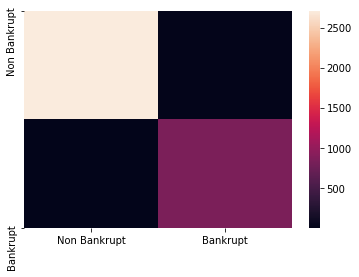

In [5]:
# In[32]:

from sklearn.tree import DecisionTreeClassifier
train_two = pd.read_csv("train_subset_two.csv")
train_two.head()


# In[33]:

y2, X2 = dmatrices('bstatus ~ trans_cf_td + trans_ca_cl + trans_re_ta + trans_ni_ta + trans_td_ta + trans_s_ta + trans_wc_ta + trans_wc_s + trans_c_cl + trans_cl_e + trans_in_s + trans_mve_td',
                  train_two, return_type="dataframe")
print (X2.columns)
# flatten y into a 1-D array
y2 = np.ravel(y2)


# In[34]:

# Building a decision tree on train data
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X2, y2)
# check the accuracy on the training set
classifier.score(X2, y2)


# In[35]:

# predict class labels for the data
predicted_tree = classifier.predict(X2)
print (predicted_tree)


# In[36]:

# generate evaluation metrics
print (metrics.accuracy_score(y2, predicted_tree))


# In[37]:

print (metrics.confusion_matrix(y2, predicted_tree))
print (metrics.classification_report(y2, predicted_tree))
cm_tree = confusion_matrix(y2, predicted_tree)
sns.heatmap(cm_tree,  
            xticklabels=['Non Bankrupt', 'Bankrupt'], 
            yticklabels=['Non Bankrupt', 'Bankrupt'])


# In[38]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif)


[0. 0. 0. ... 0. 0. 0.]
0.7955816554809844
[[2591  133]
 [ 598  254]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      2724
         1.0       0.66      0.30      0.41       852

    accuracy                           0.80      3576
   macro avg       0.73      0.62      0.64      3576
weighted avg       0.78      0.80      0.77      3576



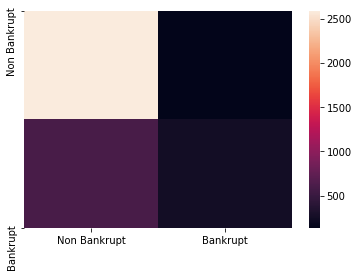

In [6]:
# In[39]:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12))
mlp.fit(X2,y2)


# In[40]:

predict_MLP = mlp.predict(X2)
print(predict_MLP)
print (metrics.accuracy_score(y2, predict_MLP))


# In[41]:

print (metrics.confusion_matrix(y2, predict_MLP))
print (metrics.classification_report(y2, predict_MLP))
cm_MLP = confusion_matrix(y2, predict_MLP)
sns.heatmap(cm_MLP,  
            xticklabels=['Non Bankrupt', 'Bankrupt'], 
            yticklabels=['Non Bankrupt', 'Bankrupt'])



Index(['Intercept', 'trans_cf_td', 'trans_ca_cl', 'trans_re_ta', 'trans_ni_ta',
       'trans_td_ta', 'trans_s_ta', 'trans_wc_ta', 'trans_wc_s', 'trans_c_cl',
       'trans_cl_e', 'trans_in_s', 'trans_mve_td'],
      dtype='object')


/home/gonzalo/repos/Bankruptcy-Prediction-using-Machine-Learning-Algorithms-in-Python/Bankruptcy-Prediction-using-Machine-Learning-Algorithms-in-Python/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0. 0. 0. ... 0. 0. 0.]
0.7663174858984689
[[2848    0]
 [ 870    5]]
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      2848
         1.0       1.00      0.01      0.01       875

    accuracy                           0.77      3723
   macro avg       0.88      0.50      0.44      3723
weighted avg       0.82      0.77      0.67      3723

[204323.32646983254, 1.0453744647957162, 2.1955172955373223, 2.2808182819503973, 1.4877720942620773, 1.6296849647369076, 1.1772101366410281, 2.2854201474870184, 1.1501567988240164, 2.005838292246824, 1.0030579144380698, 1.1773681638404503, 1.124784331927907]


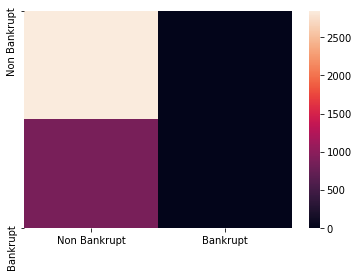

In [7]:

# In[42]:

from sklearn.svm import SVC
train_three = pd.read_csv("train_subset_three.csv")
train_three.head()


# In[43]:

y3, X3 = dmatrices('bstatus ~ trans_cf_td + trans_ca_cl + trans_re_ta + trans_ni_ta + trans_td_ta + trans_s_ta + trans_wc_ta + trans_wc_s + trans_c_cl + trans_cl_e + trans_in_s + trans_mve_td',
                  train_three, return_type="dataframe")
print (X3.columns)
# flatten y into a 1-D array
y3 = np.ravel(y3)


# In[44]:

# Building a Support Vector Machine on train data
SVC = SVC()
SVC = SVC.fit(X3, y3)
# check the accuracy on the training set
SVC.score(X3, y3)


# In[45]:

# predict class labels for the data
predicted_SVC = SVC.predict(X3)
print (predicted_SVC)


# In[46]:

# generate evaluation metrics
print (metrics.accuracy_score(y3, predicted_SVC))


# In[47]:

print (metrics.confusion_matrix(y3, predicted_SVC))
print (metrics.classification_report(y3, predicted_SVC))
cm_SVC = confusion_matrix(y3, predicted_SVC)
sns.heatmap(cm_SVC,  
            xticklabels=['Non Bankrupt', 'Bankrupt'], 
            yticklabels=['Non Bankrupt', 'Bankrupt'])


# In[48]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print(vif)

Index(['Intercept', 'trans_cf_td', 'trans_ca_cl', 'trans_re_ta', 'trans_ni_ta',
       'trans_td_ta', 'trans_s_ta', 'trans_wc_ta', 'trans_wc_s', 'trans_c_cl',
       'trans_cl_e', 'trans_in_s', 'trans_mve_td'],
      dtype='object')
[1. 1. 0. ... 0. 0. 0.]
0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
4727    0.0
4728    0.0
4729    0.0
4730    0.0
4731    0.0
Length: 4732, dtype: float64
[1. 1. 0. ... 0. 0. 0.]
0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
4727    0.0
4728    0.0
4729    0.0
4730    0.0
4731    0.0
Length: 4732, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4727    0.0
4728    0.0
4729    0.0
4730    0.0
4731    0.0
Length: 4732, dtype: float64
      p_lm  p_MLP  p_SVC
0      1.0    1.0    0.0
1      1.0    1.0    0.0
2      0.0    0.0    0.0
3      1.0    1.0    0.0
4      0.0    0.0    0.0
...    ...    ...    ...
4727   0.0    0.0    0.0
4728   0.0  

0.23267117497886727

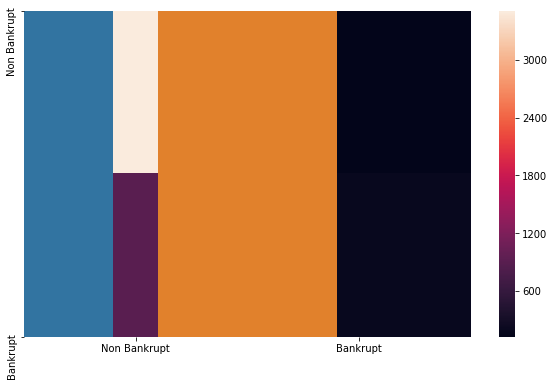

In [8]:
# In[49]:

test_data = pd.read_csv("test_data_new.csv")
test_data.head()


# In[50]:

# Displaying the frequency chart for output variable (bstatus = bankruptcy status)
plt.figure(figsize=(10,6))
sns.countplot(x='bstatus',data = test_data)


# In[51]:

y_test, X_test = dmatrices('bstatus ~ trans_cf_td + trans_ca_cl + trans_re_ta + trans_ni_ta + trans_td_ta + trans_s_ta + trans_wc_ta + trans_wc_s + trans_c_cl + trans_cl_e + trans_in_s + trans_mve_td',
                  test_data, return_type="dataframe")
print (X_test.columns)
# flatten y into a 1-D array
y_test = np.ravel(y_test)


# In[52]:

predicted_logit = model.predict(X_test)
print (predicted_logit)


# In[53]:

model.score(X_test, y_test)


# In[54]:

p_lm = pd.Series(predicted_logit)
p_lm.columns = ['p_lm']
print(p_lm)


# In[60]:

predicted_MLP = mlp.predict(X_test)
print (predicted_MLP)
mlp.score(X_test, y_test)
p_MLP = pd.Series(predicted_MLP)
p_MLP.columns = ['p_MLP']
print(p_MLP)


# In[56]:

predicted_SVC = SVC.predict(X_test)
print (predicted_SVC)
SVC.score(X_test, y_test)
p_SVC = pd.Series(predicted_SVC)
p_SVC.columns = ['p_SVC']
print(p_SVC)


# In[61]:

final_pred = pd.concat([p_lm, p_MLP, p_SVC], axis =1)
final_pred.columns = ['p_lm', 'p_MLP', 'p_SVC']
print (final_pred)


# In[62]:

predicted_bankrupt = final_pred.mode(axis=1)
print(predicted_bankrupt)


# In[63]:

# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted_logit))
print (metrics.accuracy_score(y_test, predicted_MLP))
print (metrics.accuracy_score(y_test, predicted_SVC))
print (metrics.accuracy_score(y_test, predicted_bankrupt))


# In[64]:

print (metrics.confusion_matrix(y_test, predicted_bankrupt))
print (metrics.classification_report(y_test, predicted_bankrupt))
cm_test = confusion_matrix(y_test, predicted_bankrupt)
sns.heatmap(cm_test,  
            xticklabels=['Non Bankrupt', 'Bankrupt'], 
            yticklabels=['Non Bankrupt', 'Bankrupt'])


# In[65]:

y_test.mean()

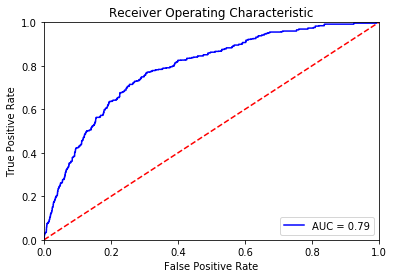

In [9]:
# In[66]:

# calculate the fpr and tpr for all thresholds of the classification
probs = mlp.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()